In [2]:
###################################################################
import pandas as pd
import matplotlib.pyplot as plt
import uproot3 as uproot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import numpy as np
import seaborn as sns
import os

import mplhep as hep
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use([hep.styles.ATLAS])

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
###################################################################

In [3]:
def getSelection(df,sectionStr):
    vars1=sectionStr.split(" ")[::3]
    mins1=[float(x) for x in sectionStr.split(" ")[1::3]]
    maxs1=[float(x) for x in sectionStr.split(" ")[2::3]]
    
    select=pd.Series(np.ones(len(df),dtype=bool))
    for var1,min1,max1 in zip(vars1,mins1,maxs1):
        if var1[0]=='!':
            var1=var1[1:]
            select &= ~((df[var1]>min1)&(df[var1]<max1))
        else:
            select &= (df[var1]>min1)&(df[var1]<max1)
    return select

In [4]:
def loadDF(fileName,treeName,cols):
    ''' Function to load a root file '''
    tree=uproot.open(fileName)[treeName]
    df=tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)
    return df

cols=["unusedEnergy","chiSq",'mmsq','pVH',
      "photonTheta1","photonTheta2","photonTheta3","photonTheta4",
      "photonE1","photonE2","photonE3","photonE4",
      "proton_momentum",'proton_z',
      'mandelstam_t','Mpi0eta','Mpi0','Meta','Mpi0p','Metap',
      'Weight'
     ]

baseDir="rootFiles/"
ts=["010020","0200325","0325050","050075","075100"]
m="104180" 
extraTag="_selectGenTandM"
dfs=[]
for t in ts:
    for pol in ["000","045","090","135"]:
        baseLoc=baseDir+"t"+t+"_m"+m+extraTag+"/"
        dataloc="pol"+pol+"_t"+t+"_m"+m+extraTag+"_DTOT_selected_acc_flat.root"
        df=loadDF(baseLoc+dataloc, 'kin', cols)
        dfs.append(df)

In [5]:
df=pd.concat(dfs).reset_index(drop=True)
df=df[getSelection(df,'pVH 0.5 999')].reset_index(drop=True)

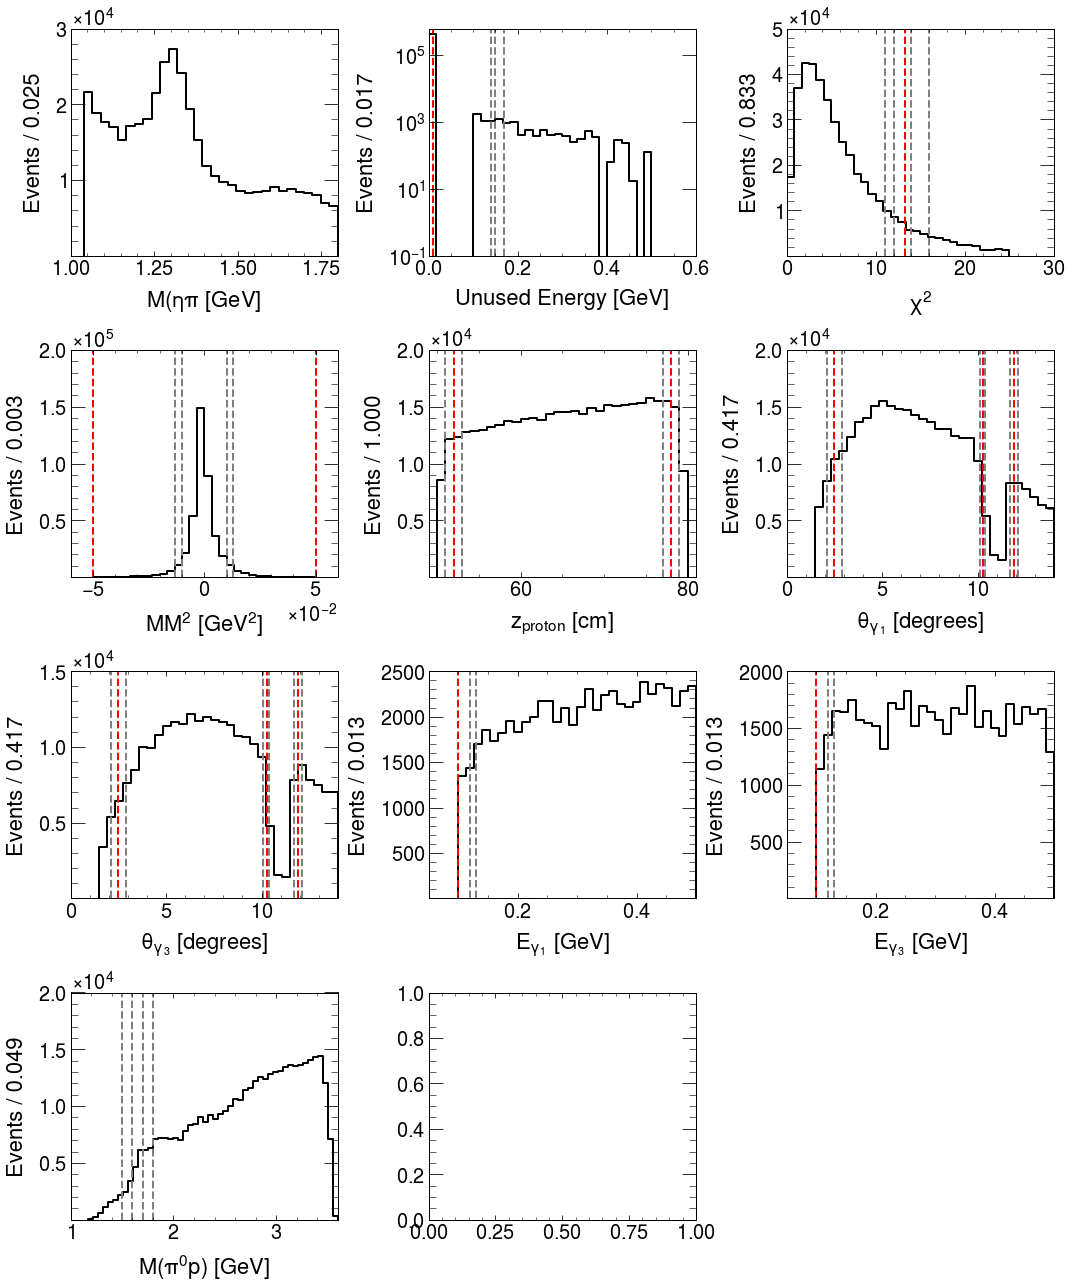

In [6]:
fig,axes=plt.subplots(4,3,figsize=(15,18))
axes=axes.flatten()

def drawHist(var,label,ax,weight='Weight',xmin=None,xmax=None,nbins=30):
    tmp=df
    if xmin:
        tmp=df[df[var]>xmin]
    if xmax:
        tmp=df[df[var]<xmax]
    out=np.histogram(tmp[var],weights=tmp[weight],bins=nbins)
    binwidth=out[1][1]-out[1][0]
    hep.histplot(out,ax=ax,c='black',histtype='step')
    ax.set_ylim(0.1)
    ax.set_xlabel(label)
    ax.set_ylabel(f'Events / {binwidth:.3f}')
    if xmax:
        ax.set_xlim(ax.get_xlim()[0],xmax)
    if xmin:
        ax.set_xlim(xmin,ax.get_xlim()[1])

drawHist('Mpi0eta',r'$M(\eta\pi$ [GeV]',axes[0])
drawHist('unusedEnergy','Unused Energy [GeV]',axes[1])
drawHist('chiSq',r'$\chi^2$',axes[2])
drawHist('mmsq',r'$MM^2$ [$GeV^2$]',axes[3],xmin=-0.06,xmax=0.06)
drawHist('proton_z',r'$z_{proton}$ [cm]',axes[4],xmin=49,xmax=81)
drawHist('photonTheta1',r'$\theta_{\gamma_1}$ [degrees]',axes[5],xmax=14,nbins=30)
drawHist('photonTheta3',r'$\theta_{\gamma_3}$ [degrees]',axes[6],xmax=14,nbins=30)
drawHist('photonE1',r'$E_{\gamma_1}$ [GeV]',axes[7],nbins=30,xmin=0.05,xmax=0.5)
drawHist('photonE3',r'$E_{\gamma_3}$ [GeV]',axes[8],nbins=30,xmin=0.05,xmax=0.5)
drawHist('Mpi0p',r'$M(\pi^0p)$ [GeV]',axes[9],nbins=50,xmax=3.6)
    
axes[1].set_yscale('log')
# axes[10].axis(False)
axes[11].axis(False)

cnom='red'
cvary='gray'

# Unused Energy
axes[1].axvline(0.01,c=cnom,linestyle='--')
axes[1].axvline(0.14,c=cvary,linestyle='--')
axes[1].axvline(0.15,c=cvary,linestyle='--')
axes[1].axvline(0.17,c=cvary,linestyle='--')

# chiSq
axes[2].axvline(13.277,c=cnom,linestyle='--')
axes[2].axvline(11,c=cvary,linestyle='--')
axes[2].axvline(12,c=cvary,linestyle='--')
axes[2].axvline(14,c=cvary,linestyle='--')
axes[2].axvline(16,c=cvary,linestyle='--')

# mmsq
axes[3].axvline(-0.05,c=cnom,linestyle='--')
axes[3].axvline(0.05,c=cnom,linestyle='--')
axes[3].axvline(-0.013,c=cvary,linestyle='--')
axes[3].axvline(0.013,c=cvary,linestyle='--')
axes[3].axvline(-0.01,c=cvary,linestyle='--')
axes[3].axvline(0.01,c=cvary,linestyle='--')

# proton z
axes[4].axvline(52,c=cnom,linestyle='--')
axes[4].axvline(78,c=cnom,linestyle='--')
axes[4].axvline(51,c=cvary,linestyle='--')
axes[4].axvline(79,c=cvary,linestyle='--')
axes[4].axvline(53,c=cvary,linestyle='--')
axes[4].axvline(77,c=cvary,linestyle='--')

# photon theta 1/2
axes[5].axvline(2.5,c=cnom,linestyle='--')
axes[5].axvline(10.3,c=cnom,linestyle='--')
axes[5].axvline(11.9,c=cnom,linestyle='--')
axes[5].axvline(2.1,c=cvary,linestyle='--')
axes[5].axvline(2.9,c=cvary,linestyle='--')
axes[5].axvline(10.1,c=cvary,linestyle='--')
axes[5].axvline(12.1,c=cvary,linestyle='--')
axes[5].axvline(10.4,c=cvary,linestyle='--')
axes[5].axvline(11.7,c=cvary,linestyle='--')

# photon theta 3/4
axes[6].axvline(2.5,c=cnom,linestyle='--')
axes[6].axvline(10.3,c=cnom,linestyle='--')
axes[6].axvline(11.9,c=cnom,linestyle='--')
axes[6].axvline(2.1,c=cvary,linestyle='--')
axes[6].axvline(2.9,c=cvary,linestyle='--')
axes[6].axvline(10.1,c=cvary,linestyle='--')
axes[6].axvline(12.1,c=cvary,linestyle='--')
axes[6].axvline(10.4,c=cvary,linestyle='--')
axes[6].axvline(11.7,c=cvary,linestyle='--')

# photon E 1/2
axes[7].axvline(0.1,c=cnom,linestyle='--')
axes[7].axvline(0.12,c=cvary,linestyle='--')
axes[7].axvline(0.13,c=cvary,linestyle='--')

# photon E 3/4
axes[8].axvline(0.1,c=cnom,linestyle='--')
axes[8].axvline(0.12,c=cvary,linestyle='--')
axes[8].axvline(0.13,c=cvary,linestyle='--')

# Mpi0 
axes[9].axvline(1.5,c=cvary,linestyle='--')
axes[9].axvline(1.6,c=cvary,linestyle='--')
axes[9].axvline(1.7,c=cvary,linestyle='--')
axes[9].axvline(1.8,c=cvary,linestyle='--')


plt.tight_layout()

plt.savefig("/d/grid17/ln16/dselector_v3/study_pwa/mass_dependent_fits/drawSystematicVariationPlots.png")

In [ ]:
def getYield(df,sectionStr):
    vars1=sectionStr.split(" ")[::3]
    mins1=[float(x) for x in sectionStr.split(" ")[1::3]]
    maxs1=[float(x) for x in sectionStr.split(" ")[2::3]]
    
    select=pd.Series(np.ones(len(df),dtype=bool))
    for var1,min1,max1 in zip(vars1,mins1,maxs1):
        if var1[0]=='!':
            var1=var1[1:]
            select &= ~((df[var1]>min1)&(df[var1]<max1))
        else:
            select &= (df[var1]>min1)&(df[var1]<max1)
    return df.loc[select,'Weight'].sum()

In [7]:
# variations=[]
# integrals=[]

# # Nominal
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# variations.append("nominal")

# # photon E
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.12 999 photonE2 0.12 999 photonE3 0.12 999 photonE4 0.12 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.13 999 photonE2 0.13 999 photonE3 0.13 999 photonE4 0.13 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# variations.append("l1PhotonE")
# variations.append("l2PhotonE")

# # photon beamline
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.1 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.1 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.1 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.1 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.9 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.9 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.9 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.9 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# variations.append("tPhotonBeam")
# variations.append("lPhotonBeam")


# # photon BCAL/FCAL
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.1 12.1 !photonTheta2 -999 2.5 !photonTheta2 10.1 12.1 \
# !photonTheta3 -999 2.5 !photonTheta3 10.1 12.1 !photonTheta4 -999 2.5 !photonTheta4 10.1 12.1 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.4 11.7 !photonTheta2 -999 2.5 !photonTheta2 10.4 11.7 \
# !photonTheta3 -999 2.5 !photonTheta3 10.4 11.7 !photonTheta4 -999 2.5 !photonTheta4 10.4 11.7 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# variations.append("tPhotonTrans")
# variations.append("lPhotonTrans")

# # proton z
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 51 79 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 53 77 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.01'))
# variations.append("lProtonZ")
# variations.append("tProtonZ")


# # unused energy
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.2'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 13.277 unusedEnergy -999 0.4'))
# variations.append("l1UE")
# variations.append("l2UE")

# # chiSq
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 11 unusedEnergy -999 0.01'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.05 0.05 chiSq -999 18 unusedEnergy -999 0.01'))
# variations.append("tChi")
# variations.append("lChi")

# # mmsq
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.013 0.013 chiSq -999 13.277 unusedEnergy -999 0.01'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.01 0.01 chiSq -999 13.277 unusedEnergy -999 0.01'))
# variations.append("t1MMSq")
# variations.append("t2MMSq")

# # Mpi0p
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.013 0.013 chiSq -999 13.277 unusedEnergy -999 0.01 Mpi0p 1.4 999'))
# integrals.append(getYield(df,'Mpi0eta 1.04 1.72 pVH 0.5 999 mandelstam_t 0.1 1.0 !photonTheta1 -999 2.5 !photonTheta1 10.3 11.9 !photonTheta2 -999 2.5 !photonTheta2 10.3 11.9 \
# !photonTheta3 -999 2.5 !photonTheta3 10.3 11.9 !photonTheta4 -999 2.5 !photonTheta4 10.3 11.9 \
# photonE1 0.1 999 photonE2 0.1 999 photonE3 0.1 999 photonE4 0.1 999 \
# proton_momentum 0.3 999 proton_z 52 78 mmsq -0.01 0.01 chiSq -999 13.277 unusedEnergy -999 0.01 Mpi0p 1.5 999'))
# variations.append("t1")
# variations.append("t2MMSq")


# variations, integrals = np.array(variations), np.array(integrals)
# integrals /= integrals[0]


# integrals